## Non-Naive CD4 T cell Plots

In [1]:
import scanpy as sc
import pandas as pd 
import numpy as np
import anndata
import re
import h5py
import scipy.sparse as scs
import concurrent.futures
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
import seaborn as sns
from scipy.sparse import csc_matrix
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm
import umap
import random
import multiprocessing
random.seed(123)
from joblib import Parallel, delayed
import warnings
#warnings.filterwarnings('ignore')
import os
import gc
import math
from PIL import Image
from PIL import ImageDraw
import sc_toolbox as sct

/home/jupyter/libs/py_scrna/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# loading the Non-naive CD4 T cell population

In [3]:
subset_a_dc1=sc.read("/home/jupyter/ALTRA_ANALYSIS/Deep_clean/certpro/py_files/ALTRA_certpro_CD4_memory_Tcells_NMF_res_0_4.h5ad")

/home/jupyter/libs/py_scrna/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [7]:
fig_path = "/home/jupyter/ALTRA_ANALYSIS/Deep_clean/Figure_files/Certpro_figures/Plots_for_manuscript//"

In [8]:
figsize = (4,4)
sc.settings.figdir = fig_path
sc.settings.autosave=False
sc.set_figure_params(vector_friendly=True, dpi_save=300)
plt.figure(figsize=figsize)

<Figure size 320x320 with 0 Axes>

<Figure size 320x320 with 0 Axes>

# Figure 4C

/home/jupyter/libs/py_scrna/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/home/jupyter/libs/py_scrna/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


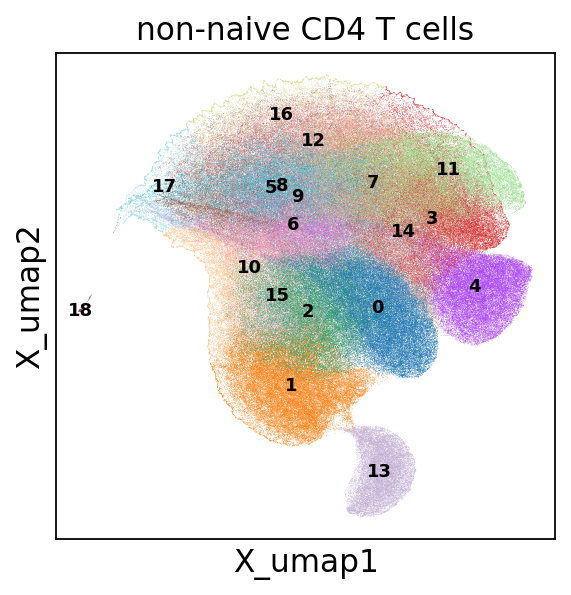

In [9]:
# Plot the UMAP and customize the plot
sc.pl.embedding(
    subset_a_dc1, 
    color='leiden_NMF_0.4_v1', 
    basis='X_umap', 
    legend_loc='on data', 
    legend_fontsize='xx-small', 
    title='non-naive CD4 T cells', 
    save="Fig_4C.pdf"
)

# Figure 4E

/home/jupyter/libs/py_scrna/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jupyter/libs/py_scrna/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jupyter/libs/py_scrna/lib/python3.11/site-packages/scanpy/tools/_dendrogram.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=F

/home/jupyter/libs/py_scrna/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


<Figure size 320x320 with 0 Axes>

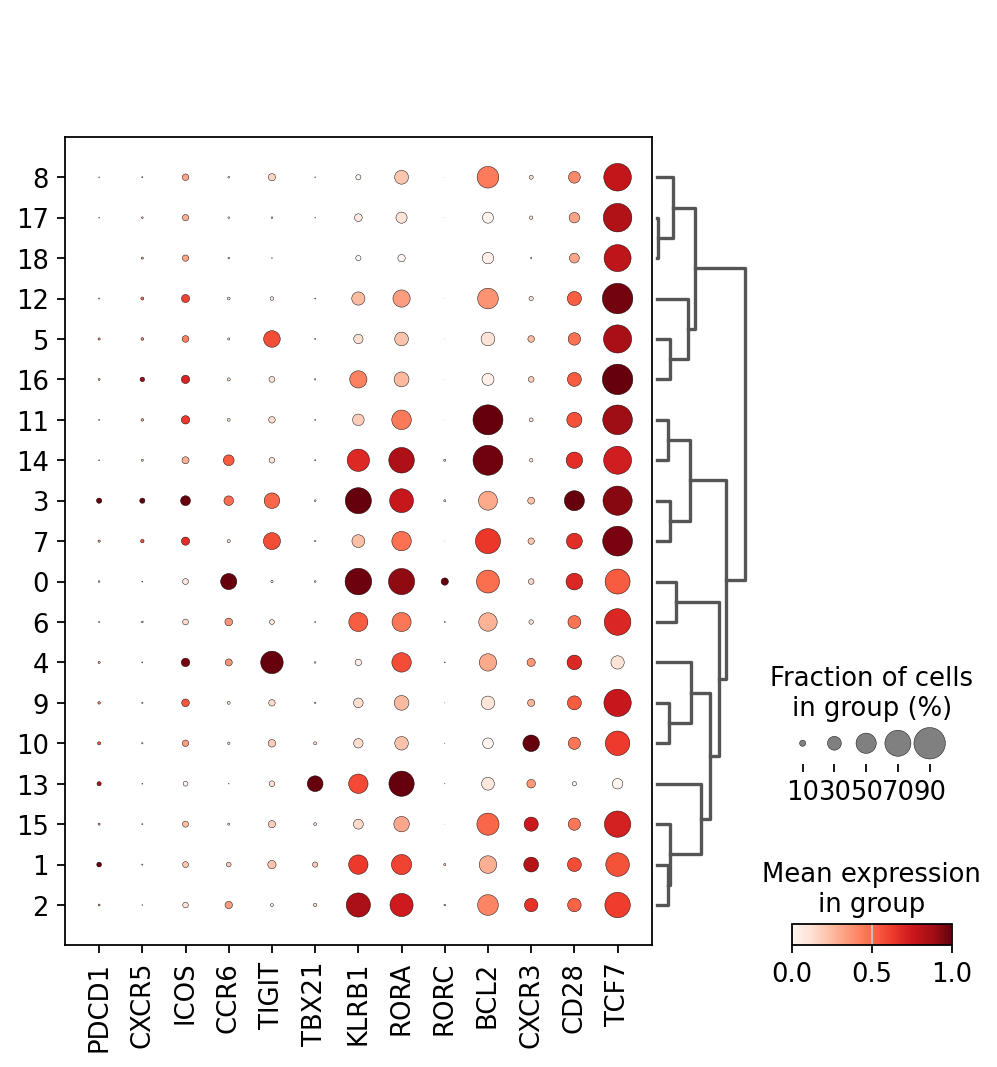

In [10]:
# Set the figure size
plt.figure(figsize=(4,4))
sc.pl.dotplot(subset_a_dc1, ['PDCD1', 'CXCR5', 'ICOS', 'CCR6', 'TIGIT', 'TBX21', 'KLRB1', 'RORA', 'RORC', 'BCL2',"CXCR3","CD28","TCF7"],
              "leiden_NMF_0.4_v1",standard_scale='var',
              save='Fig_4E.pdf',
              dendrogram=True)

# Figure 4F

In [11]:
subset_a_dc1.obs['C3_leiden_NMF_0.4_v1'] = subset_a_dc1.obs['leiden_NMF_0.4_v1'].apply(lambda x: x if x == '3' else 'other_clusters')

In [12]:
subset_a_dc1.obs['C3_leiden_NMF_0.4_v1'].value_counts()

C3_leiden_NMF_0.4_v1
other_clusters    426267
3                  34277
Name: count, dtype: int64

In [13]:
gene_names = subset_a_dc1.raw.var_names
cell_annotations = subset_a_dc1.obs

# Extract indices for the genes of interest
genes_of_interest = ['LIMS1', 'KLRB1', 'MAF', 'NEAT1','CD28']
indices = [i for i, gene in enumerate(gene_names) if gene in genes_of_interest] # gets the indices of the genes in adata

dense_matrix = subset_a_dc1.raw.X.toarray()

# Extract the data for the specified genes
data = dense_matrix[:, indices]

# Create a DataFrame for gene expression
df1 = pd.DataFrame(data, columns=[gene_names[i] for i in indices], index=subset_a_dc1.obs_names)

# Optionally, add additional metadata (e.g., 'C3_leiden_NMF_0.4_v1') to the DataFrame
df1 = df1.join(cell_annotations[['C3_leiden_NMF_0.4_v1','barcodes']])

# Display the DataFrame
print(df1.head())

                                     LIMS1     CD28     NEAT1     KLRB1  \
barcodes                                                                  
c68ffbec42fe11ecbc8902dee9a94afb  0.000000  0.00000  1.894191  1.478942   
c6915a2842fe11ecbc8902dee9a94afb  0.000000  0.00000  0.000000  0.000000   
c691873242fe11ecbc8902dee9a94afb  0.923979  0.00000  0.923979  0.000000   
781386e469f511ee9378c2fb727395d0  2.207003  1.30729  0.000000  0.000000   
78134d8c69f511ee9378c2fb727395d0  0.000000  0.00000  2.124233  1.543990   

                                       MAF C3_leiden_NMF_0.4_v1  \
barcodes                                                          
c68ffbec42fe11ecbc8902dee9a94afb  0.755856                    3   
c6915a2842fe11ecbc8902dee9a94afb  0.000000       other_clusters   
c691873242fe11ecbc8902dee9a94afb  0.000000       other_clusters   
781386e469f511ee9378c2fb727395d0  0.000000       other_clusters   
78134d8c69f511ee9378c2fb727395d0  0.000000       other_clusters   

    

In [14]:
df1.shape

(460544, 7)

In [15]:
df1_sub = df1[['LIMS1', 'KLRB1', 'MAF', 'NEAT1','barcodes']]

In [16]:
df1_sub.head()

LIMS1     KLRB1       MAF     NEAT1  \
barcodes                                                                   
c68ffbec42fe11ecbc8902dee9a94afb  0.000000  1.478942  0.755856  1.894191   
c6915a2842fe11ecbc8902dee9a94afb  0.000000  0.000000  0.000000  0.000000   
c691873242fe11ecbc8902dee9a94afb  0.923979  0.000000  0.000000  0.923979   
781386e469f511ee9378c2fb727395d0  2.207003  0.000000  0.000000  0.000000   
78134d8c69f511ee9378c2fb727395d0  0.000000  1.543990  0.000000  2.124233   

                                                          barcodes  
barcodes                                                            
c68ffbec42fe11ecbc8902dee9a94afb  c68ffbec42fe11ecbc8902dee9a94afb  
c6915a2842fe11ecbc8902dee9a94afb  c6915a2842fe11ecbc8902dee9a94afb  
c691873242fe11ecbc8902dee9a94afb  c691873242fe11ecbc8902dee9a94afb  
781386e469f511ee9378c2fb727395d0  781386e469f511ee9378c2fb727395d0  
78134d8c69f511ee9378c2fb727395d0  78134d8c69f511ee9378c2fb727395d0

In [17]:
df2_sub=df1[['C3_leiden_NMF_0.4_v1']]

In [18]:
df2_sub.head()

C3_leiden_NMF_0.4_v1
barcodes                                             
c68ffbec42fe11ecbc8902dee9a94afb                    3
c6915a2842fe11ecbc8902dee9a94afb       other_clusters
c691873242fe11ecbc8902dee9a94afb       other_clusters
781386e469f511ee9378c2fb727395d0       other_clusters
78134d8c69f511ee9378c2fb727395d0       other_clusters

In [19]:
df2 = df1_sub.set_index('barcodes').stack().reset_index()
df2.columns = ['barcodes', 'gene', 'value']
df2

barcodes   gene     value
0        c68ffbec42fe11ecbc8902dee9a94afb  LIMS1  0.000000
1        c68ffbec42fe11ecbc8902dee9a94afb  KLRB1  1.478942
2        c68ffbec42fe11ecbc8902dee9a94afb    MAF  0.755856
3        c68ffbec42fe11ecbc8902dee9a94afb  NEAT1  1.894191
4        c6915a2842fe11ecbc8902dee9a94afb  LIMS1  0.000000
...                                   ...    ...       ...
1842171  c6ab631048bd11eab2ee7a6edf799b61  NEAT1  2.110198
1842172  848bf81cc0a511eba8817233ea04b219  LIMS1  0.000000
1842173  848bf81cc0a511eba8817233ea04b219  KLRB1  1.962025
1842174  848bf81cc0a511eba8817233ea04b219    MAF  0.000000
1842175  848bf81cc0a511eba8817233ea04b219  NEAT1  2.582293

[1842176 rows x 3 columns]

In [20]:
# Merge the subset with df2 based on 'barcodes'
df3= df2.merge(df2_sub, on='barcodes', how='inner')

In [21]:
df3

barcodes   gene     value  \
0        c68ffbec42fe11ecbc8902dee9a94afb  LIMS1  0.000000   
1        c68ffbec42fe11ecbc8902dee9a94afb  KLRB1  1.478942   
2        c68ffbec42fe11ecbc8902dee9a94afb    MAF  0.755856   
3        c68ffbec42fe11ecbc8902dee9a94afb  NEAT1  1.894191   
4        c6915a2842fe11ecbc8902dee9a94afb  LIMS1  0.000000   
...                                   ...    ...       ...   
1842171  c6ab631048bd11eab2ee7a6edf799b61  NEAT1  2.110198   
1842172  848bf81cc0a511eba8817233ea04b219  LIMS1  0.000000   
1842173  848bf81cc0a511eba8817233ea04b219  KLRB1  1.962025   
1842174  848bf81cc0a511eba8817233ea04b219    MAF  0.000000   
1842175  848bf81cc0a511eba8817233ea04b219  NEAT1  2.582293   

        C3_leiden_NMF_0.4_v1  
0                          3  
1                          3  
2                          3  
3                          3  
4             other_clusters  
...                      ...  
1842171       other_clusters  
1842172       other_clusters  
1842173       other_clusters  
1842174       other_clusters  
1842175       other_clusters  

[1842176 rows x 4 columns]

In [22]:
df3[['gene','C3_leiden_NMF_0.4_v1']].value_counts()

gene   C3_leiden_NMF_0.4_v1
KLRB1  other_clusters          426267
LIMS1  other_clusters          426267
NEAT1  other_clusters          426267
MAF    other_clusters          426267
LIMS1  3                        34277
KLRB1  3                        34277
MAF    3                        34277
NEAT1  3                        34277
Name: count, dtype: int64

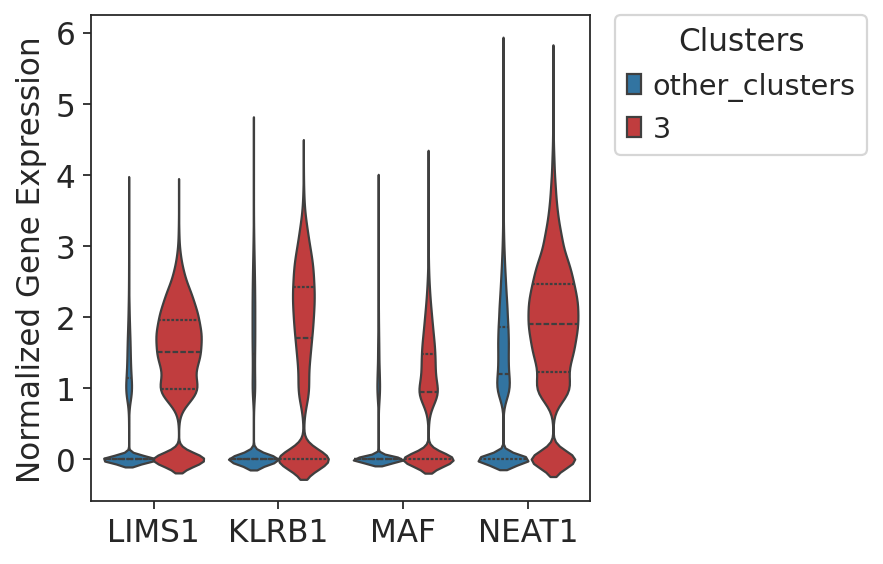

In [23]:
custom_palette = {'3': '#d62728', 'other_clusters': '#1f77b4'}
sns.set_style("ticks")
sns.violinplot(data=df3, x='gene', y='value', hue="C3_leiden_NMF_0.4_v1",
               split=False, inner='quart', linewidth=1, palette=custom_palette,
               hue_order=['other_clusters', '3'], density_norm="width")  # Order of clusters
plt.ylabel('Normalized Gene Expression')
plt.xlabel('')  # Leave x-axis label blank
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
legend.set_title('Clusters')
# Save the plot w
plt.savefig("/home/jupyter/ALTRA_ANALYSIS/Deep_clean/Figure_files/Certpro_figures/Plots_for_manuscript/Fig_4F.pdf", bbox_inches='tight', pad_inches=0.2)
plt.show()

# Figure 4H

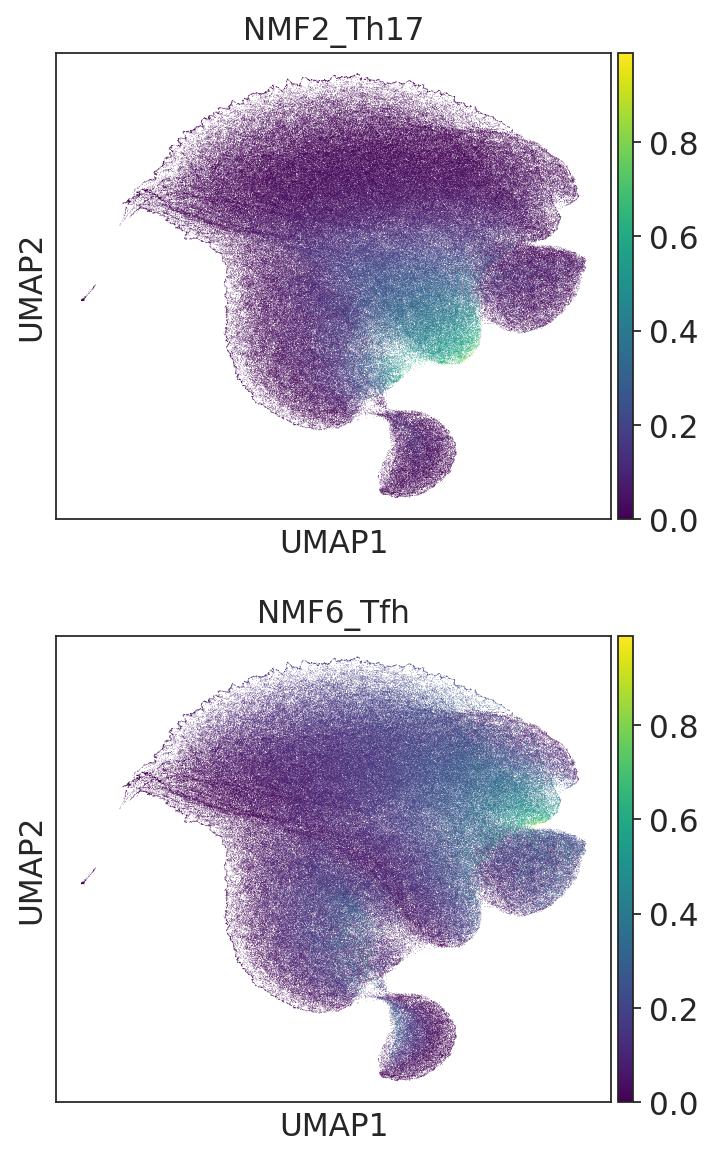

In [24]:
NMF_score_tfh_th17=subset_a_dc1.obs[[ 'NMF2_Th17','NMF6_Tfh']]
sc.pl.umap(subset_a_dc1, color=NMF_score_tfh_th17.columns, use_raw=True, ncols=1, vmax=0.99, cmap='viridis',
           save='Fig_4H.pdf')

# Supplementary Figures

## Figure S7 D

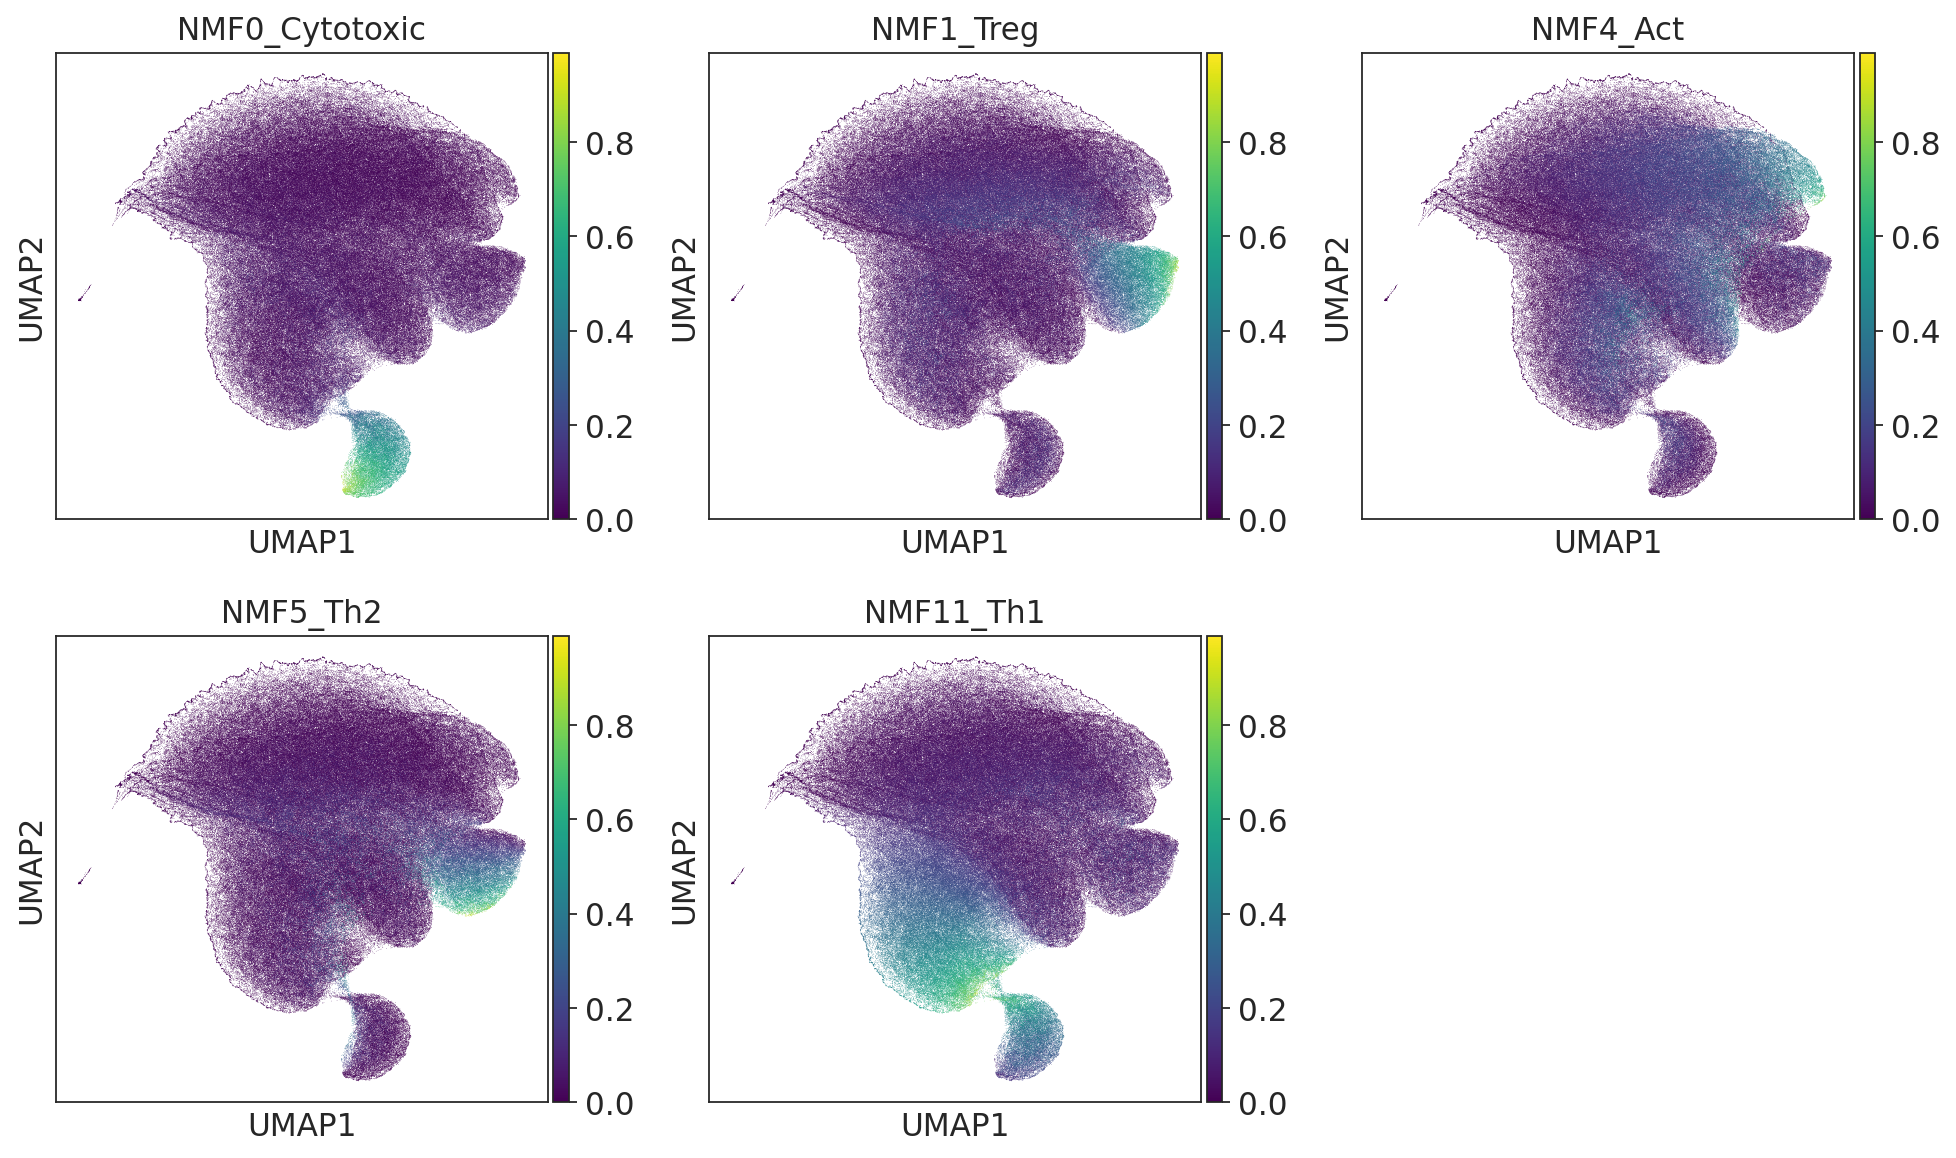

In [25]:
combined_features_NMF1 =subset_a_dc1.obs[['NMF0_Cytotoxic', 'NMF1_Treg', 
                                          'NMF4_Act', 
                                          'NMF5_Th2',  
                                          'NMF11_Th1']]
sc.pl.umap(subset_a_dc1, color=combined_features_NMF1.columns, use_raw=True, ncols=3, vmax=0.99, cmap='viridis',
           save='Fig_S7D.pdf')

# Figure S7 C

In [26]:
# Filter out the cluster '3' to avoid replotting
filtered_data = subset_a_dc1[subset_a_dc1.obs['leiden_NMF_0.4_v1'] != '3']


In [ ]:
# Generate the UMAP embedding density plot for the filtered data
fig = sc.pl.embedding_density(
    filtered_data, 
    basis='umap', 
    groupby='leiden_NMF_0.4_v1',  # Group by clusters
    show=False,
    return_fig=True  # Return the figure object
)

/home/jupyter/libs/py_scrna/lib/python3.11/site-packages/scanpy/plotting/_tools/__init__.py:1487: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[density_col_name] = dens_values


In [20]:
# Save the combined figure
fig.savefig(f'{fig_path}Fig_S7_C.pdf')
plt.close(fig)

# Figure S7 B

/home/jupyter/libs/py_scrna/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/home/jupyter/libs/py_scrna/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


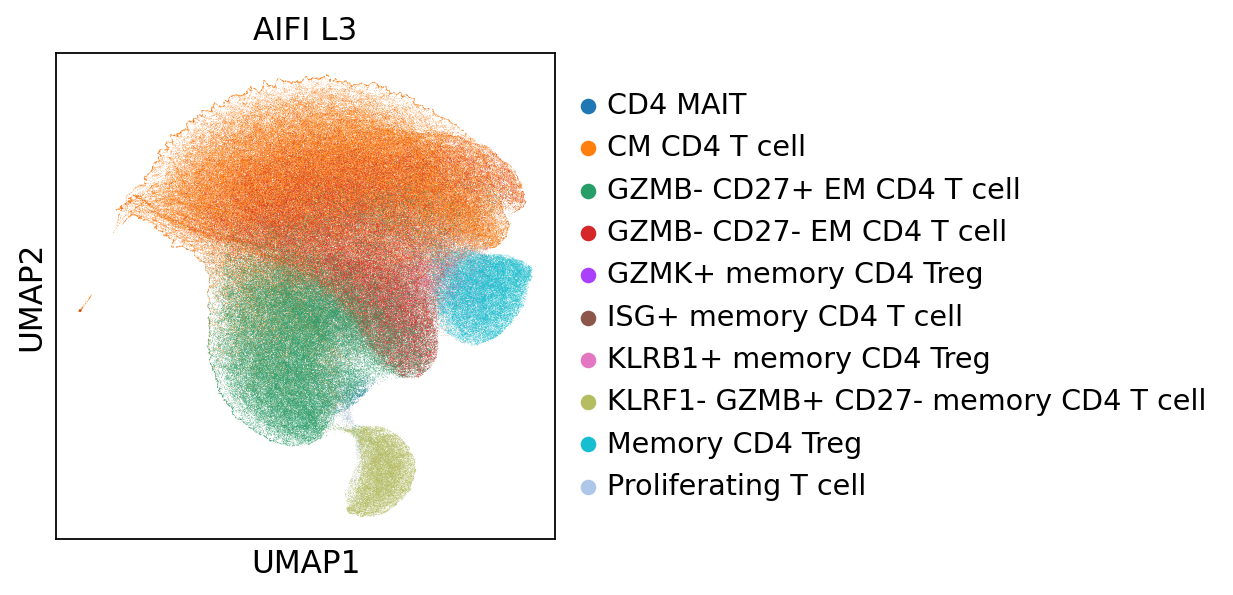

In [21]:
sc.pl.umap(subset_a_dc1, color=['AIFI_L3_new'], title='AIFI L3',save="AIFI_L3_S7_B.pdf")

# Figure S7 A

/tmp/ipykernel_35129/227151818.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


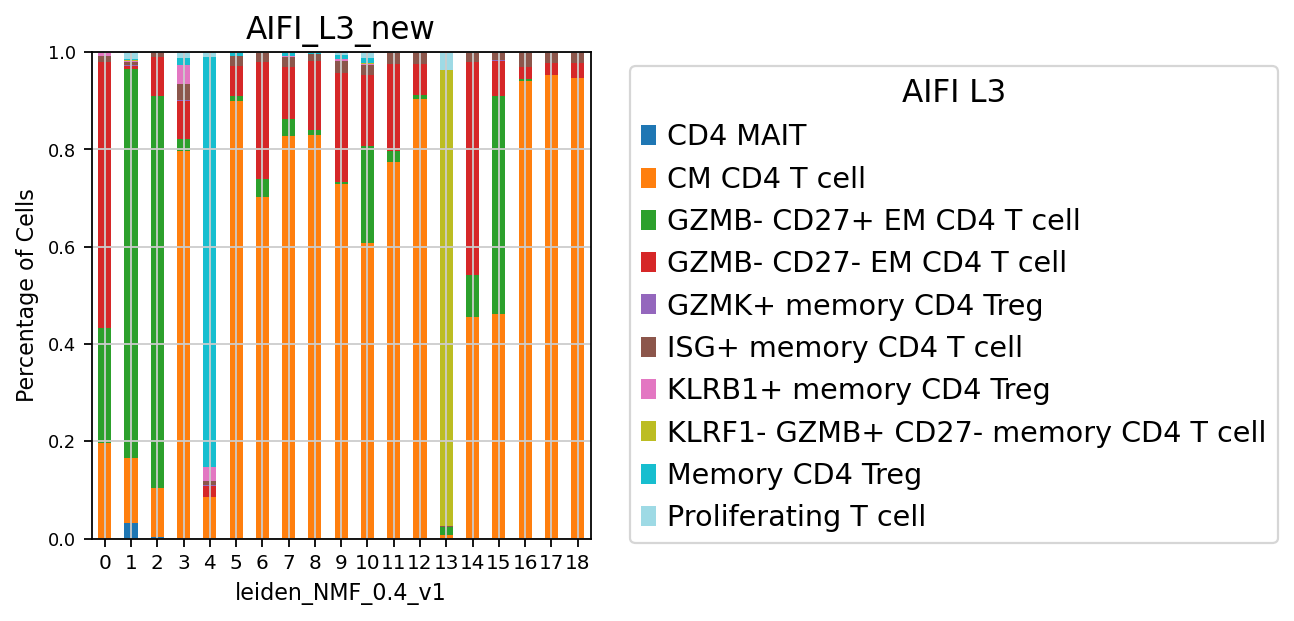

In [43]:
custom_colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#bcbd22','#17becf','#9edae5']
clusters = subset_a_dc1.obs['leiden_NMF_0.4_v1']
cell_types = subset_a_dc1.obs['AIFI_L3_new']

# Calculate the percentage of cells in each cluster for each cell type
cluster_celltype_counts = pd.crosstab(clusters, cell_types)
cluster_celltype_percentages = cluster_celltype_counts.div(cluster_celltype_counts.sum(axis=1), axis=0)


ax = cluster_celltype_percentages.plot(kind='bar', stacked=True, color=custom_colors)
plt.xlabel('leiden_NMF_0.4_v1', fontsize=10)  # Adjust the fontsize as needed
plt.ylabel('Percentage of Cells', fontsize=10)  # Adjust the fontsize as needed
plt.title('AIFI_L3_new')
plt.xticks(rotation=0, fontsize=9)  # Rotate x-axis labels and adjust fontsize
plt.yticks(fontsize=8)  # Adjust y-axis labels fontsize
plt.legend(title='AIFI L3', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 for percentages
plt.tight_layout()
plt.savefig(f"{fig_path1}/Fig_S7_A.pdf", dpi=300, bbox_inches='tight')